# Data Exploration

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the datasets
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [4]:
df_train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


## Initial Thoughts and Conclusions 

I begin by creating a 'data exploration spreadsheet', in which I describe the type of each feature (categorical or numerical) and my expectation of its importance in predicting 'Habitability_score'. 

After the analysis to follow, I added my conclusions to the spreadsheet.

## Analysing 'Habitability_score'

In [6]:
# statistics summary
df_train['Habitability_score'].describe()

count    39499.000000
mean        73.482297
std         14.118753
min          7.280000
25%         69.660000
50%         75.760000
75%         82.260000
max        100.000000
Name: Habitability_score, dtype: float64

Looks good! All values are between 0 and 100, with a mean of ~ 73. 

<AxesSubplot:xlabel='Habitability_score', ylabel='Density'>

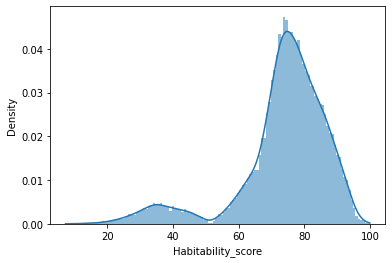

In [17]:
# histogram
sns.histplot(df_train['Habitability_score'], kde=True, stat="density", linewidth=0)

The target variable deviates from the normal distributation. There are 2 peaks - a strong peak at ~75 and a much weaker peak around 35. We also have negative skewness.

In [23]:
# kurtosis and skewness
skewness = df_train['Habitability_score'].skew()
kurtosis = df_train['Habitability_score'].kurt()
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


Skewness: -1.5536975975778544
Kurtosis: 2.723091666549109


## Initial Relationship Exploration 

#### Numerical features

<AxesSubplot:xlabel='Neighborhood_Review', ylabel='Habitability_score'>

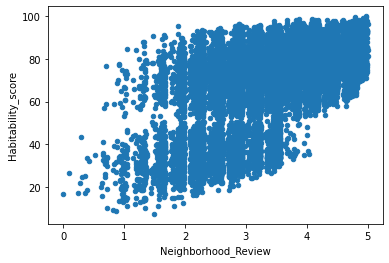

In [25]:
# scatter plot neighbourhood_review/habitability_score
data = pd.concat([df_train['Habitability_score'], df_train['Neighborhood_Review']], axis=1)
data.plot.scatter(x='Neighborhood_Review', y='Habitability_score')

There does seem to be some positive correlation between neighborhood review and habitability scores. There are 2 clusters - corresponding to the 2 peaks of habitability score. It would be very useless to find a feature (or combination of features) that seperates the data into these 2 clusters.

<AxesSubplot:xlabel='Property_Area', ylabel='Habitability_score'>

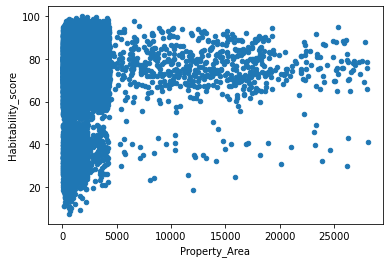

In [26]:
# scatter plot property_area/habitability_score
data = pd.concat([df_train['Habitability_score'], df_train['Property_Area']], axis=1)
data.plot.scatter(x='Property_Area', y='Habitability_score')

There seems to be little correlation between these two variables.

#### Categorical Features

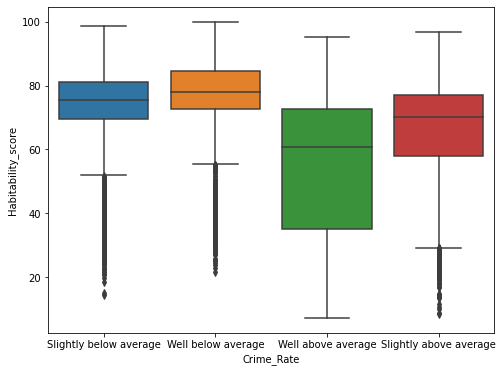

In [29]:
var = 'Crime_Rate'
data = pd.concat([df_train['Habitability_score'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Habitability_score', data=data)


To my surprise, there seems to be little correlation between crime rate and habitability score.

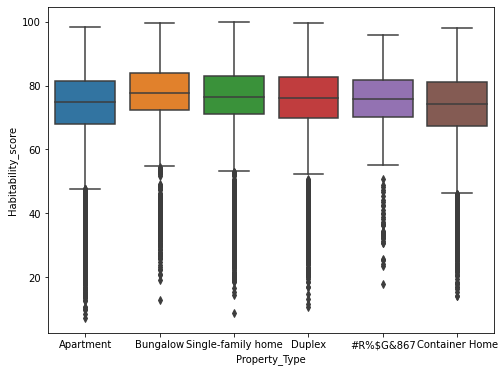

In [33]:
var = 'Property_Type'
data = pd.concat([df_train['Habitability_score'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Habitability_score', data=data)

Again, there looks to be very little correlation.

## More Thorough Relationship Exploration

<AxesSubplot:>

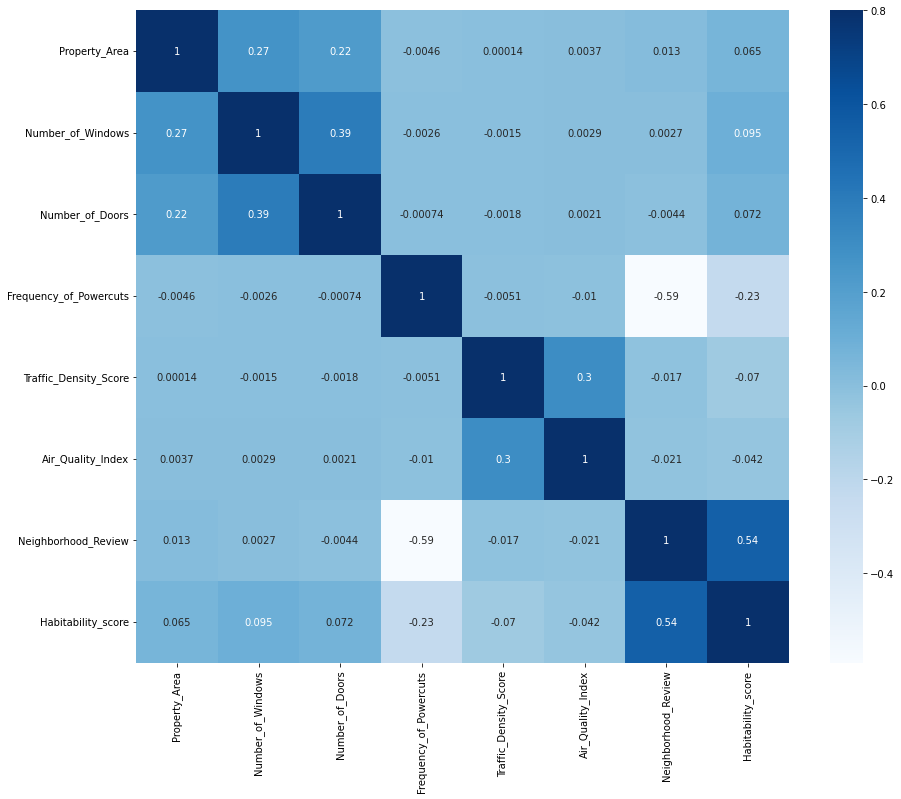

In [38]:
# correlation matrix
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmatrix, vmax=0.8, cmap="Blues", annot=True, square=True)

Observations:

1. Neighborhood_Review is the most correlated with Habitability_score
2. Frequency_of_Powercuts is reasonably (negatively) correlated with Habitability_score
3. 